In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
from glob import glob

import matplotlib.pyplot as plt

import rioxarray as rio
from shapely.geometry import mapping

%matplotlib inline
# %matplotlib widget

## time-series for median annual precipitation locations

#### select time_series of climate data for the coordinates of the median points

(1) read median precipitation locations 


(2) read climate data 

## read locations of median precip data + hma boundaries

In [13]:
locations = pd.read_csv('out/median_annual_precip_regions.csv').drop('Unnamed: 0', axis =1)#.set_index('Name')

hma = gpd.read_file('HMA_regions/HMA_regions.shp')

Text(0.5, 1.0, 'median annual precipitation sum per region [m]')

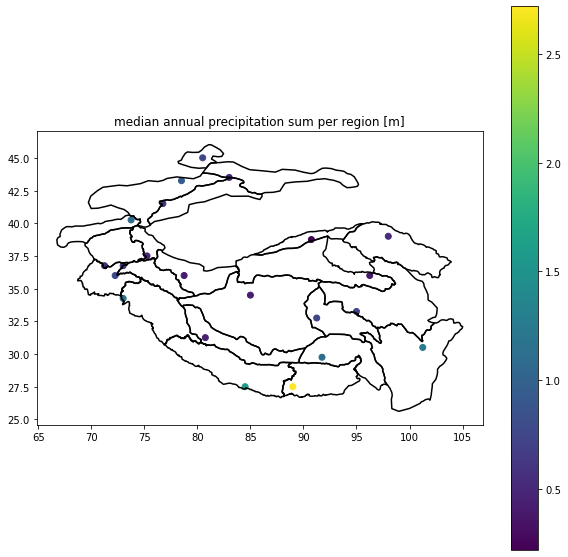

In [14]:
# plot locations: 
fig, ax = plt.subplots(figsize=(10, 10))
# hma bounds
hma.boundary.plot(ax = ax, color='black' )
# points
plt.scatter(x = locations.longitude, y = locations.latitude, c = locations.tp_median)

plt.colorbar()
plt.title('median annual precipitation sum per region [m]')

## read all climate data 

In [16]:
# ---- read
t2m_all = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/2m-temperature/*.nc', decode_coords = "all")
tp_all = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/*.nc', decode_coords = "all")
solar_all = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/surface-solar-radiation-downwards/*.nc', decode_coords = "all")
tcc_all = xr.open_mfdataset('/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-cloud-cover/*.nc', decode_coords = "all")

# ---- merge
climate_all = xr.merge([tp_all, t2m_all, solar_all, tcc_all])

# --- units 

#convert temperature K to C
climate_all['t2m']=climate_all.t2m-273.15

# precipotation m to mm 
climate_all['tp']=climate_all.tp * 1000

# radiation j/m2 to w/m2
# SSR [W/m2] = SSR [J/m^2] / (3600 seconds)
climate_all['ssrd'] = climate_all.ssrd / 3600


/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexe

In [17]:
# climate_all.time.values

array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', ...,
       '2020-12-31T21:00:00.000000000', '2020-12-31T22:00:00.000000000',
       '2020-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
%%time
# ---- clip dates: 

climate_all = climate_all.sel(time=slice("2000-01-01", "2020-12-31"))
climate_all = climate_all.sel(expver= slice(0, 1))

# ---- to dataframe:

climate_all=climate_all.to_dataframe()

<xarray.Dataset>
Dimensions:    (expver: 1, longitude: 277, latitude: 197, time: 984)
Coordinates:
  * expver     (expver) int32 1
  * longitude  (longitude) float32 55.0 55.25 55.5 55.75 ... 123.5 123.8 124.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 6.75 6.5 6.25 6.0
  * time       (time) datetime64[ns] 2019-01-01 ... 2019-02-10T23:00:00
Data variables:
    t2m        (time, latitude, longitude, expver) float32 dask.array<chunksize=(984, 197, 277, 1), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-01-17 08:08:09 GMT by grib_to_netcdf-2.7.0: /opt/ecmwf...

In [ ]:
climate_all.dropna().drop_duplicates()
# climate_all.head()


In [ ]:
climate_all = climate_all.reset_index()#.expver.values

In [ ]:
climate_all1 = climate_all[climate_all.expver == 1]

climate_all5 = climate_all[climate_all.expver == 5]

In [ ]:
climate_all1.head()

In [ ]:
climate_all5.head()